In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import sklearn
from sklearn.linear_model import SGDClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

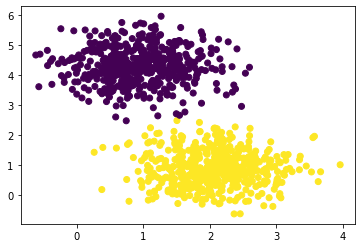

In [3]:
X, Y = make_blobs(n_samples=1000, centers=2, random_state=0, cluster_std=0.60)
Y[Y==0] = -1
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

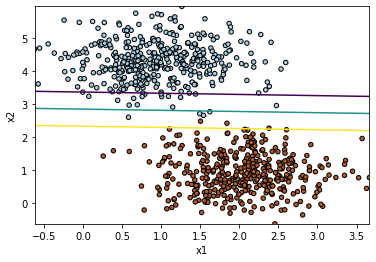

In [12]:
W = np.random.rand(2,1)
b = np.random.rand()
H_params = W,b
lr=[1e-1,1e-3]
n_iter = 200
lr_diff = lr[1]-lr[0]
loss="hinge"
batch_size=50
C = 0.1
X = X_train
Y = Y_train
X_new = X_test

for t in range(n_iter):
    lr_t = (lr_diff/(n_iter-1))*t + lr[0]   # linear
    
    
    batch_indxs = np.random.choice(len(X), size=batch_size, replace=False)
    X_batch = X[batch_indxs]
    Y_batch = Y[batch_indxs]
    
    
    delI_by_delW = np.zeros(W.shape)
    delI_by_delb = 0
    # sum the hinge loss gradients by looping over each sample
    for x,y in zip(X_batch,Y_batch):
        output = y*(np.dot(W.transpose(), x) + b)
        if loss in ["hinge", "sq_hinge"]:
            if output < 1:
                if loss == "hinge":
                    delI_by_delW += -y*np.transpose([x])
                    delI_by_delb += -y
            elif loss == "sq_hinge":  # use smaller value of C for squared hinge loss
                delI_by_delW += 2*(1-output)*(-y*np.transpose([x]))
                delI_by_delb += 2*(1-output)*(-y)
        elif loss == "logistic":
            delI_by_delW += (-np.exp(output)/(1+np.exp(output)))*(-y*np.transpose([x]))
            delI_by_delb += (-np.exp(output)/(1+np.exp(output)))*(-y)

    delI_by_delW = delI_by_delW*len(X)/batch_size
    delI_by_delb = delI_by_delb*len(X)/batch_size

    delf_by_delW = W + C*delI_by_delW
    delf_by_delb = C*delI_by_delb

    W = W - lr_t*delf_by_delW
    b = b - lr_t*delf_by_delb
    
q = np.dot(W.transpose(), X_new.transpose()) + b

Y_new = [-1 if pred <= 0 else 1 for pred in q[0].tolist()]



fig, ax = plt.subplots()
ax.set_xlabel("x1");  ax.set_ylabel("x2")

x1min, x2min = np.min(X, axis=0)
x1max, x2max = np.max(X, axis=0)
xx = np.linspace(x1min, x1max, 10)
yy = np.linspace(x2min, x2max, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = np.dot(W.transpose(), [[x1], [x2]]) + b
    Z[i, j] = p[0]
levels = [-1.0, 0.0, 1.0]
ax.contour(X1, X2, Z, levels)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired,
               edgecolor='black', s=20)

